In [48]:
import urllib.request as ul
import json, datetime, time
import pandas as pd


In [49]:
movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
print(movieDate)
movieDate = 20200130

20200131


In [58]:
url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
# url = f"http... targetDt={movieDate}" 치환 

request = ul.Request(url)
print(request)
response = ul.urlopen(request)
print(response)
rescode = response.getcode()
print(rescode)
if (rescode==200):
    responseData = response.read()

200


In [59]:
result = json.loads(responseData)
print(result)
pre_result = result["boxOfficeResult"]
# print(pre_result)

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스', 'showRange': '20200130~20200130', 'dailyBoxOfficeList': [{'rnum': '1', 'rank': '1', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20180939', 'movieNm': '남산의 부장들', 'openDt': '2020-01-22', 'salesAmt': '945095180', 'salesShare': '44.0', 'salesInten': '-355976620', 'salesChange': '-27.4', 'salesAcc': '32547144270', 'audiCnt': '118080', 'audiInten': '-93877', 'audiChange': '-44.3', 'audiAcc': '3743582', 'scrnCnt': '1383', 'showCnt': '7262'}, {'rnum': '2', 'rank': '2', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20192101', 'movieNm': '히트맨', 'openDt': '2020-01-22', 'salesAmt': '602166980', 'salesShare': '28.1', 'salesInten': '-228841510', 'salesChange': '-27.5', 'salesAcc': '15390499240', 'audiCnt': '74508', 'audiInten': '-62668', 'audiChange': '-45.7', 'audiAcc': '1789019', 'scrnCnt': '1027', 'showCnt': '4745'}, {'rnum': '3', 'rank': '3', 'rankInten': '0', 'rankOldAndNew': 'OLD', 'movieCd': '20188421', 'movieNm': '미스터 주: 사라진

In [60]:
pre_result1 = pre_result["dailyBoxOfficeList"]
# print(pre_result1)
# print(type(pre_result1))

In [121]:
# json을 -> 딕셔너리화 하면 -> 판다스로 바꾸기 쉬우므로
cine = [{}]
# 날짜, 영화이름, 누적 관객수
for i in range (0, len(pre_result1)):
    pre_result1[i]['targetDt'] = movieDate
    cine.append(pre_result1[i])
# print(cine)

In [122]:
# 반복함수 마지막에 날짜를 줄이는 함수를 사용한다

# str -> date 
datetime_obj=datetime.datetime.strptime(str(movieDate), "%Y%m%d").date()

# 1주일씩 시간을 줄여간다?
datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)
# datetime_obj_tmp = datetime_obj - datetime.timedelta(weeks=1)

# date -> str
day = datetime_obj_tmp.strftime('%Y-%m-%d').split("-")
movieDate = day[0]+day[1]+day[2]

#time.sleep(1)
print(movieDate)

20200128


In [132]:
# print(cine)
dataframe = pd.DataFrame(cine)

# 첫행이 비어있음
dataframe = dataframe[1:]

  rnum rank rankInten rankOldAndNew   movieCd         movieNm      openDt  \
1    1    1         0           OLD  20180939         남산의 부장들  2020-01-22   
2    2    2         0           OLD  20192101             히트맨  2020-01-22   
3    3    3         0           OLD  20188421  미스터 주: 사라진 VIP  2020-01-22   
4    4    4         0           OLD  20192300       스파이 지니어스   2020-01-22   
5    5    5         0           OLD  20100312             인셉션  2010-07-21   

    salesAmt salesShare  salesInten salesChange     salesAcc audiCnt  \
1  945095180       44.0  -355976620       -27.4  32547144270  118080   
2  602166980       28.1  -228841510       -27.5  15390499240   74508   
3   92604980        4.3   -56547680       -37.9   4580917060   12298   
4   88064900        4.1   -37017120       -29.6   3075484300   11730   
5   67568700        3.1   -21178300       -23.9  43645889200    8346   

  audiInten audiChange  audiAcc scrnCnt showCnt  targetDt  
1    -93877      -44.3  3743582    1383    7

In [128]:
# convert 'col_str_1' and 'col_str_2' to numeric
#df2[['col_int_1', 'col_int_2']] = df2[['col_str_1', 'col_str_2']].apply(pd.to_numeric)

In [134]:
dataframe[['audiInten', 'audiCnt']] = dataframe[['audiInten', 'audiCnt']].apply(pd.to_numeric)


In [135]:
dataframe['audiyest']= dataframe['audiInten']+dataframe['audiCnt']

print(dataframe.head())

  rnum rank rankInten rankOldAndNew   movieCd         movieNm      openDt  \
1    1    1         0           OLD  20180939         남산의 부장들  2020-01-22   
2    2    2         0           OLD  20192101             히트맨  2020-01-22   
3    3    3         0           OLD  20188421  미스터 주: 사라진 VIP  2020-01-22   
4    4    4         0           OLD  20192300       스파이 지니어스   2020-01-22   
5    5    5         0           OLD  20100312             인셉션  2010-07-21   

    salesAmt salesShare  salesInten salesChange     salesAcc  audiCnt  \
1  945095180       44.0  -355976620       -27.4  32547144270   118080   
2  602166980       28.1  -228841510       -27.5  15390499240    74508   
3   92604980        4.3   -56547680       -37.9   4580917060    12298   
4   88064900        4.1   -37017120       -29.6   3075484300    11730   
5   67568700        3.1   -21178300       -23.9  43645889200     8346   

   audiInten audiChange  audiAcc scrnCnt showCnt  targetDt  audiyest  
1     -93877      -44.3  37

In [137]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# print(dataframe)

In [138]:
dataframe.to_csv("cine.csv")
data = pd.read_csv("cine.csv") 
print(data.iloc[:5, :7])

   Unnamed: 0  rnum  rank  rankInten rankOldAndNew   movieCd         movieNm
0           1     1     1          0           OLD  20180939         남산의 부장들
1           2     2     2          0           OLD  20192101             히트맨
2           3     3     3          0           OLD  20188421  미스터 주: 사라진 VIP
3           4     4     4          0           OLD  20192300       스파이 지니어스 
4           5     5     5          0           OLD  20100312             인셉션


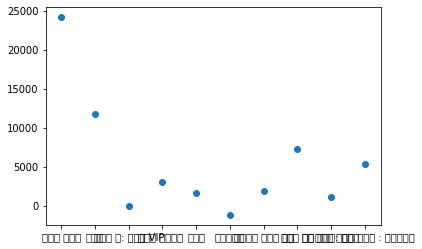

In [142]:

scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(data['movieNm'], data['audiyest']) 

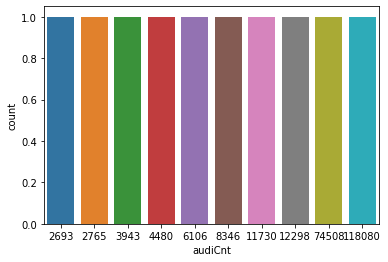

In [155]:
ax = plt.subplots() 
ax = sns.countplot('audiCnt', data=data) 


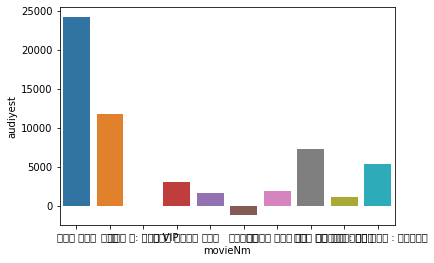

In [148]:
ax = plt.subplots() 
ax = sns.barplot(x=data['movieNm'], y=data['audiyest'], data=data) 

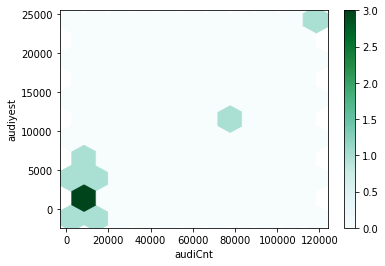

In [153]:
fig, ax = plt.subplots() 
ax = data.plot.hexbin(x='audiCnt', y='audiyest', gridsize=10, ax=ax) 

In [ ]:

import urllib.request as ul
import json, datetime, time
import pandas as pd

def info():
    movieDate=time.strftime('%Y%m%d', time.localtime(time.time()))
    print(movieDate)
    cine=[{}]
    
    for i in range(0, 30):
        url = f"http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=66e652e1d2656b42f10d93c91e0295e4&targetDt={movieDate}"
        # url = f"http... targetDt={movieDate}" 치환 

        request = ul.Request(url)
        print(request)
        response = ul.urlopen(request)
        print(response)
        rescode = response.getcode()
        print(rescode)
        if (rescode==200):
        responseData = response.read()
        